# SMS Spam Detector

## Importing the libraries

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [70]:
with open('spam.csv', encoding='utf-8', errors='ignore') as f:
    dataset = pd.read_csv(f)

In [71]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will _ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Filtering Data

In [72]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
existing_columns_to_drop = [col for col in columns_to_drop if col in dataset.columns]
dataset.drop(columns=existing_columns_to_drop, inplace=True)

dataset.rename(columns={'v1':'target','v2':'text'},inplace=True)

dataset

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [73]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [74]:
dataset['target'] = encoder.fit_transform(dataset['target'])

# Exploring the Data

In [75]:
dataset['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

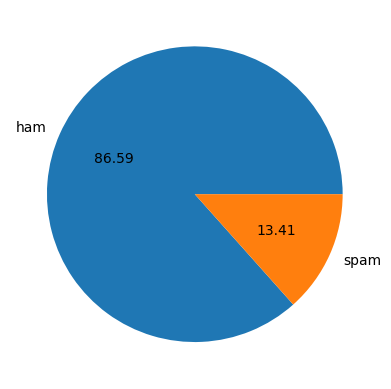

In [76]:
import matplotlib.pyplot as plt
plt.pie(dataset['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

## Data Pre-Processing

In [77]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [79]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [80]:
dataset['transformed_text'] = dataset['text'].apply(transform_text)

In [81]:
dataset

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u 750 pound prize 2 cla...
5568,0,Will _ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [82]:
!pip install wordcloud

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [83]:
spam_wc = wc.generate(dataset[dataset['target'] == 1]['transformed_text'].str.cat(sep=" "))

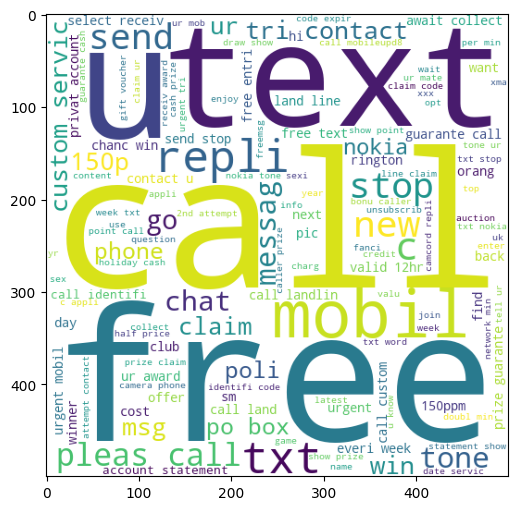

In [84]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [85]:
ham_wc = wc.generate(dataset[dataset['target'] == 0]['transformed_text'].str.cat(sep=" "))

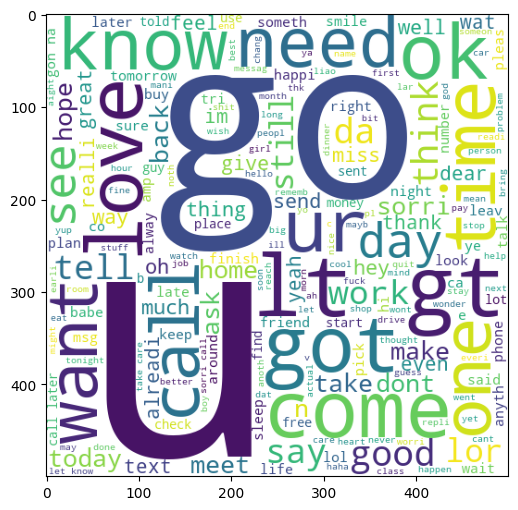

In [86]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

# Training Model

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [88]:
X = tfidf.fit_transform(dataset['transformed_text']).toarray()
y = dataset['target'].values

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [90]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [91]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [92]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8636037329504667
[[1051  147]
 [  43  152]]
0.5083612040133779


In [93]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9540559942569993
[[1198    0]
 [  64  131]]
1.0


In [94]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9720028715003589
[[1196    2]
 [  37  158]]
0.9875


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [96]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [97]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [98]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9662598707824839
Precision -  0.9805194805194806
For  KN
Accuracy -  0.8951902368987796
Precision -  1.0
For  NB
Accuracy -  0.9540559942569993
Precision -  1.0
For  DT
Accuracy -  0.9303661162957645
Precision -  0.8450704225352113
For  LR
Accuracy -  0.9468772433596554
Precision -  0.9481481481481482
For  RF
Accuracy -  0.968413496051687
Precision -  1.0


c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.95908111988514
Precision -  0.9156626506024096
For  BgC
Accuracy -  0.9547738693467337
Precision -  0.8975903614457831
For  ETC
Accuracy -  0.9676956209619526
Precision -  0.993421052631579
For  GBDT
Accuracy -  0.9425699928212491
Precision -  0.9389312977099237


In [99]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.895190,1.000000
2,NB,0.954056,1.000000
5,RF,0.968413,1.000000
8,ETC,0.967696,0.993421
0,SVC,0.966260,0.980519
4,LR,0.946877,0.948148
9,GBDT,0.942570,0.938931
6,AdaBoost,0.959081,0.915663
7,BgC,0.954774,0.897590
3,DT,0.930366,0.845070


## Predicting Results

In [109]:
# Enter SMS Message
sms = 'Aft i finish my lunch then i go str down lor. Ard 3 smth lor. U finish ur lunch already?'
# sms = 'England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/̼1.20 POBOXox36504W45WQ 16+'

In [110]:
transformed_sms = tfidf.transform([transform_text(sms)]).toarray()

In [111]:
for name,clf in clfs.items():
    
    answer=clf.predict(transformed_sms)  
    print("For ",name)
    print("Result",answer)

    if(answer[0]==0):
        print("ham")
    else:
        print("spam")
    

For  SVC
Result [0]
ham
For  KN
Result [0]
ham
For  NB
Result [0]
ham
For  DT
Result [0]
ham
For  LR
Result [0]
ham
For  RF
Result [0]
ham
For  AdaBoost
Result [0]
ham
For  BgC
Result [0]
ham
For  ETC
Result [0]
ham
For  GBDT
Result [0]
ham
